# The Sparks Foundation - Data Science & Business Analytics Internship

# Task-7:

# Author : VIJAY CHAWLA

# Grip @The Sparks Foundation

# Objective:

# Stock Market Prediction using Numerical and Textual Analysis


● Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

● Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

● Download historical stock prices from finance.yahoo.com

● Download textual (news) data from https://bit.ly/36fFPI6

# Importing the Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
new_col_names = ['Date', 'Category', 'News']
news_df = pd.read_csv('india-news-headlines.csv', names=new_col_names)
news_df.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?


In [3]:
news_df.drop(0, inplace=True)
news_df.drop('Category', axis=1, inplace=True)
news_df.head()

,Date,News
1,20010101,win over cena satisfying but defeating underta...
2,20010102,Status quo will not be disturbed at Ayodhya; s...
3,20010102,Fissures in Hurriyat over Pak visit
4,20010102,America's unwanted heading for India?
5,20010102,For bigwigs; it is destination Goa


In [9]:
import pandas_datareader as pdr

stock_data = pdr.get_data_yahoo('AMZN', start='2017-01-1',end='2020-12-15')
stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983
2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993
2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012
2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990
2017-01-09,801.770020,791.770020,798.000000,796.919983,3446100,796.919983
2017-01-10,798.000000,789.539978,796.599976,795.900024,2558400,795.900024
2017-01-11,799.500000,789.510010,793.659973,799.020020,2992800,799.020020
2017-01-12,814.130005,799.500000,800.309998,813.640015,4873900,813.640015
2017-01-13,821.650024,811.400024,814.320007,817.140015,3791900,817.140015


In [10]:
stock_data.to_csv('amzn.csv')

In [11]:
df=pd.read_csv('amzn.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983
1,2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993
2,2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012
3,2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990
4,2017-01-09,801.770020,791.770020,798.000000,796.919983,3446100,796.919983


# Visualization

In [12]:
df_1 = df.reset_index()['Close']
df_1.head()

0    753.669983
1    757.179993
2    780.450012
3    795.989990
4    796.919983
Name: Close, dtype: float64

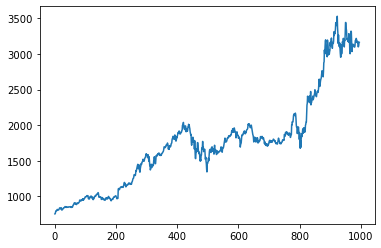

In [13]:
plt.plot(df_1)

# Data Preprocessing

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_1 = scaler.fit_transform(np.array(df_1).reshape(-1,1))
df_1

array([[0.        ],
       [0.0012636 ],
       [0.0096408 ],
       [0.01523519],
       [0.01556999],
       [0.0152028 ],
       [0.016326  ],
       [0.02158919],
       [0.02284919],
       [0.02017798],
       [0.01937158],
       [0.01993318],
       [0.0196776 ],
       [0.02311559],
       [0.02475719],
       [0.02982599],
       [0.03077279],
       [0.02955599],
       [0.02761559],
       [0.02513158],
       [0.02832478],
       [0.03106079],
       [0.02035079],
       [0.0194292 ],
       [0.02117879],
       [0.0237744 ],
       [0.02436838],
       [0.02656439],
       [0.02982959],
       [0.02977919],
       [0.03205079],
       [0.03256919],
       [0.03290398],
       [0.03699718],
       [0.03669837],
       [0.03546718],
       [0.03296518],
       [0.03418918],
       [0.03289317],
       [0.03578758],
       [0.03428637],
       [0.03463558],
       [0.03345837],
       [0.03324599],
       [0.03485878],
       [0.03575878],
       [0.03556439],
       [0.036

# Splitting the DataSet



In [15]:
train_size=int(len(df_1)*0.65)
test_size=len(df_1)-train_size
train_data,test_data=df_1[0:train_size,:],df_1[train_size:len(df_1),:1]

In [16]:
def create_dataset(dataset, time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [17]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [18]:
X_train

array([[0.        , 0.0012636 , 0.0096408 , ..., 0.07843314, 0.08160473,
        0.08629554],
       [0.0012636 , 0.0096408 , 0.01523519, ..., 0.08160473, 0.08629554,
        0.08715955],
       [0.0096408 , 0.01523519, 0.01556999, ..., 0.08629554, 0.08715955,
        0.08749074],
       ...,
       [0.33929975, 0.33795336, 0.32950053, ..., 0.44350526, 0.44669485,
        0.44897007],
       [0.33795336, 0.32950053, 0.31402054, ..., 0.44669485, 0.44897007,
        0.43925364],
       [0.32950053, 0.31402054, 0.31216658, ..., 0.44897007, 0.43925364,
        0.42817649]])

In [19]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((546, 100, 1), (248, 100, 1), (546,), (248,))

# Tensorflow Models



In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Model Training



In [27]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Train on 546 samples, validate on 248 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
546/546 [==============================] - 17s 32ms/sample - loss: 0.0432 - val_loss: 0.0049
Epoch 2/100
546/546 [==============================] - 13s 24ms/sample - loss: 0.0088 - val_loss: 0.1042
Epoch 3/100
546/546 [==============================] - 12s 23ms/sample - loss: 0.0057 - val_loss: 0.0207
Epoch 4/100
546/546 [==============================] - 12s 22ms/sample - loss: 0.0034 - val_loss: 0.0319
Epoch 5/100
546/546 [==============================] - 12s 22ms/sample - loss: 0.0019 - val_loss: 0.0059
Epoch 6/100
546/546 [==============================] - 12s 22ms/sample - loss: 9.4595e-04 - val_loss: 0.0047
Epoch 7/100
546/546 [==============================] - 12s 22ms/sample - loss: 7.0322e-04 - val_loss: 0.0029
Epoch 8/100
546/546 [==============================] - 12s 23ms/sample - loss: 7.2103e-04 - val_loss: 0.0027
Epoch 9/100
546/546 [==============================] -

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Mean Squarred Error



In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1559.384399925193

In [31]:
math.sqrt(mean_squared_error(y_test,test_predict))

2451.2643844750137

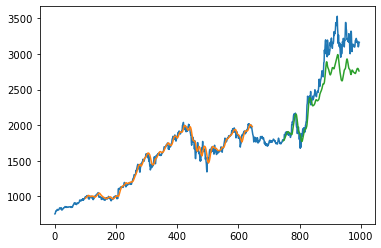

In [32]:
look_back=100
trainpredictplot=np.empty_like(df_1)
trainpredictplot[:, :]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#shif test predict for plot
testpredictplot=np.empty_like(df_1)
testpredictplot[:, :]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df_1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df_1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

# Prediction

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [35]:
len(df_1)

996

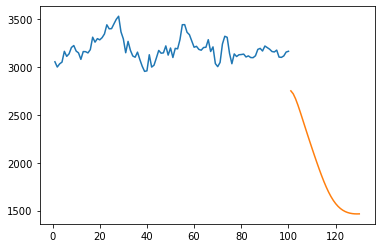

In [36]:
x_input=test_data[248:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array
lst_output=[]
n_steps= 100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

plt.plot(day_new,scaler.inverse_transform(df_1[896:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output));

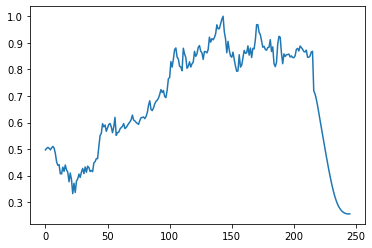

In [37]:
df3=df_1.tolist()
df3.extend(lst_output)
plt.plot(df3[780:]);

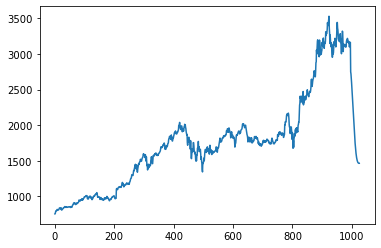

In [38]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)